In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(keep='first' , inplace=True)

Number of perople having sex as 1 are206 and NUmber of people having sex as 0 are96


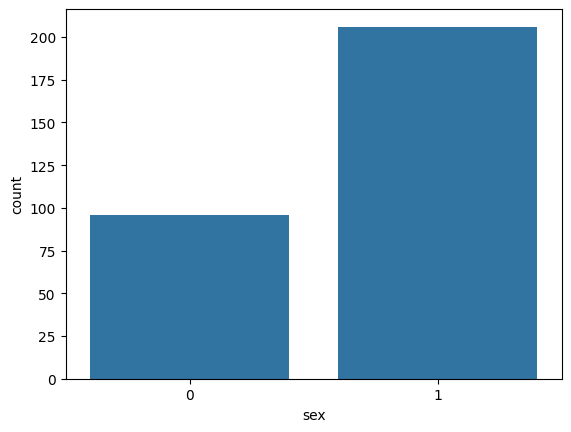

In [10]:
#Gender Categoraization

x=(df.sex.value_counts())
print(f'Number of perople having sex as 1 are{x[1]} and NUmber of people having sex as 0 are{x[0]}')
p=sns.countplot(data=df , x='sex')
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


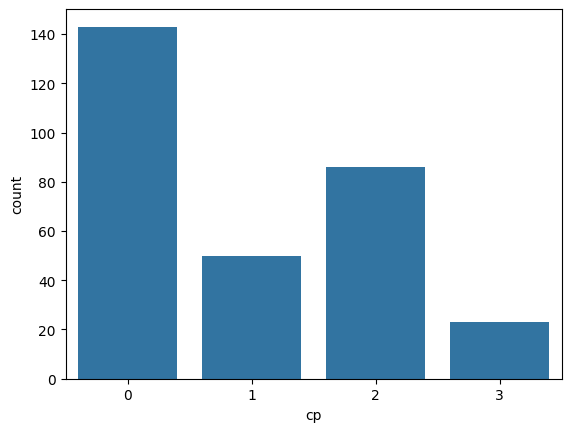

In [11]:
x=(df.cp.value_counts())
print(x)
p=sns.countplot(data=df , x='cp')
plt.show()

<Figure size 1000x1000 with 0 Axes>

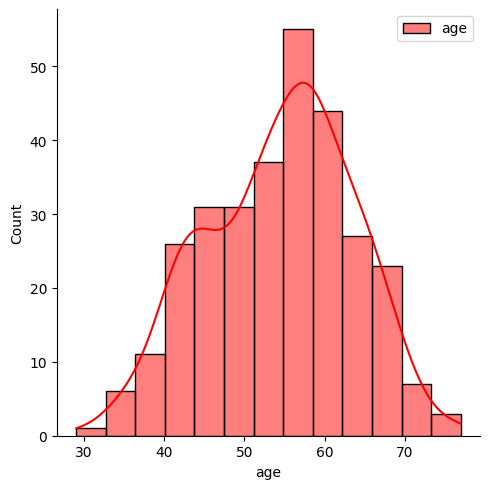

In [12]:
#Age Distribution

plt.figure(figsize=(10,10))
sns.displot(df.age , color='red' , label="age" , kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

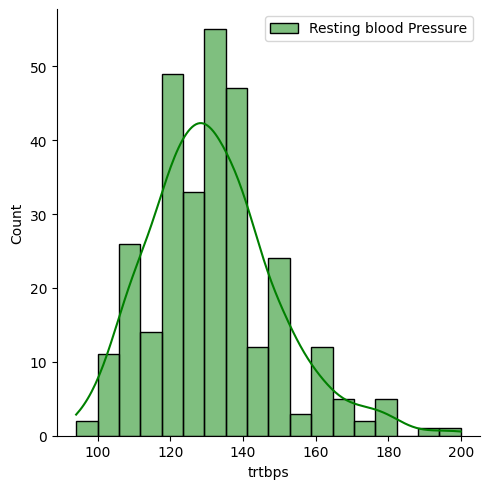

In [14]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps , color='green' , label="Resting blood Pressure" , kde=True)
plt.legend()

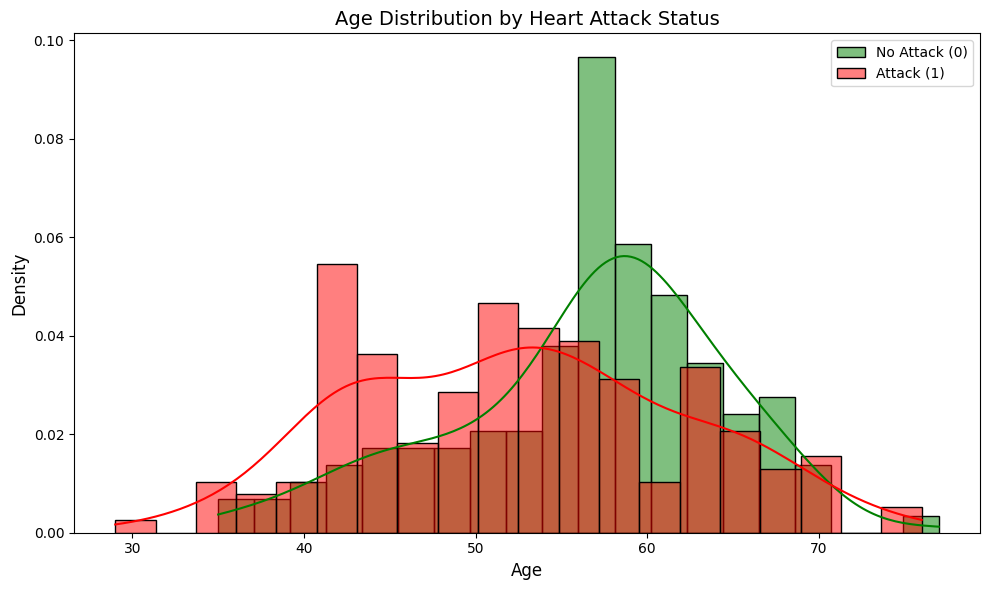

In [15]:

plt.figure(figsize=(10, 6))

# Plot distribution for output=0 (green - no attack)
sns.histplot(df[df['output']==0]['age'],
             color='green',
             kde=True,
             label='No Attack (0)',
             alpha=0.5,
             stat='density',
             bins=20)

# Plot distribution for output=1 (red - attack)
sns.histplot(df[df['output']==1]['age'],
             color='red',
             kde=True,
             label='Attack (1)',
             alpha=0.5,
             stat='density',
             bins=20)

plt.title("Age Distribution by Heart Attack Status", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

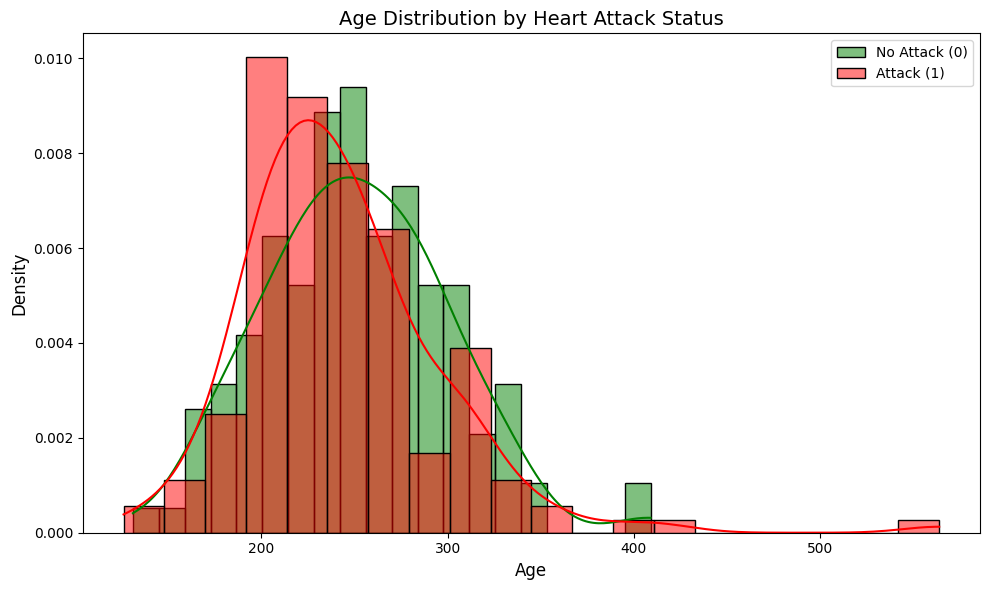

In [16]:
 plt.figure(figsize=(10, 6))

# Plot distribution for output=0 (green - no attack)
sns.histplot(df[df['output']==0]['chol'],
             color='green',
             kde=True,
             label='No Attack (0)',
             alpha=0.5,
             stat='density',
             bins=20)

# Plot distribution for output=1 (red - attack)
sns.histplot(df[df['output']==1]['chol'],
             color='red',
             kde=True,
             label='Attack (1)',
             alpha=0.5,
             stat='density',
             bins=20)

plt.title("Age Distribution by Heart Attack Status", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
y=df.iloc[:,-1].values
x=df.iloc[:,1:-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(x, y, random_state=42 ,test_size=0.25 )

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train , y_train)

GaussianNB()

In [22]:
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

0.868421052631579